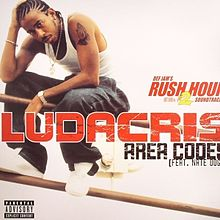

In [1]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/en/thumb/e/e0/CS81698-01A-BIG.jpg/220px-CS81698-01A-BIG.jpg")

[Ludacris](https://en.wikipedia.org/wiki/Ludacris) is a rapper with success in the early 2000's who went on to become an actor. His most famous role is probably in _The Fast and the Furious_ movies. Anyways, he's got this song named <a href="https://en.wikipedia.org/wiki/Area_Codes_(song)">Area Codes</a> where he raps about all the area codes in which he's got "hoes". I've seen an old version of a map where all the [area codes he mentions are mapped](http://flowingdata.com/2008/03/10/area-codes-in-which-ludacris-claims-to-have-hoes/). It's from 2008 and the link from [FlowingData.com](www.flowingdata.com) claims that the source is from a non-operational blog called [Strangemaps.com](https://strangemaps.wordpress.com/).


I haven't worked very much with maps or shapefiles so I thought it would be fun to recreate this map in Python. It was a good experience and I wanted to share it.

In [2]:
# import libraries
from bs4 import BeautifulSoup
import requests
import re

import warnings
warnings.filterwarnings('ignore')

%load_ext version_information

First I scrape the lyrics from the song page at http://rap.genius.com/.

In [3]:
# this is the url for the page 
artist_url = "http://genius.com/Ludacris-area-codes-lyrics"

# Scrap rap genius lyrics page
response = requests.get(artist_url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko'})
soup = BeautifulSoup(response.text, "html.parser")
lyrics = soup.find('div', class_='lyrics').text.strip()

Let's check that is worked. The lyrics should be in a long string.

In [4]:
print(lyrics)

[Chorus: Nate Dogg]
I’ve got hoes, I’ve got hoes
In different area codes (Area), area codes (Codes)
Hoes! Hoes, hoes, in different area codes (Area)
Area codes (Codes)
Hoes!

[Verse 1 - Ludacris]
Now you thought I was just 7-7-0, and 4-0-4?
I'm worldwide, bitch act like y'all don't know
It's the abominable ho man
Globe-trot international post man
Neighbor-dick dope man
7-1-8's, 2-0-2's
I send small cities and states I-O-U's
9-0-1, matter of fact 3-0-5
I'll jump off the G4, we can meet outside
So control your hormones and keep your drawers on
'Til I close the door and I'm jumping your bones
3-1-2's, 3-1-3's (oh)
2-1-5's, 8-0-tree's (oh)
Read your horoscope and eat some hors d'oeuvres
10 on pump one; these hoes is self serve
7-5-7, 4-1-0's, my cell phone just overloads

[Chorus: Nate Dogg]
I’ve got hoes, I’ve got hoes
In different area codes (Area), area codes (Codes)
Hoes! Hoes, hoes, in different area codes (Area)
Area codes (Codes)
I’ve got hoes!

[Verse 2 - Ludacris]
Now every day is

Success! Now, let's scrape out all the area codes. If you look, they are in a format #-#-#. We can use a regular expressiong to search for this pattern.

By the way, regular expressions are a blank magic. I use an online site [www.pyrex.com](http://www.pyregex.com/?id=eyJyZWdleCI6IlswLTldLVswLTldLVswLTldIiwiZmxhZ3MiOjAsIm1hdGNoX3R5cGUiOiJmaW5kYWxsIiwidGVzdF9zdHJpbmciOiJbVmVyc2UgMSAtIEx1ZGFjcmlzXVxuTm93IHlvdSB0aG91Z2h0IEkgd2FzIGp1c3QgNy03LTAsIGFuZCA0LTAtND9cbkknbSB3b3JsZHdpZGUsIGJpdGNoIGFjdCBsaWtlIHknYWxsIGRvbid0IGtub3dcbkl0J3MgdGhlIGFib21pbmFibGUgaG8gbWFuXG5HbG9iZS10cm90IGludGVybmF0aW9uYWwgcG9zdCBtYW5cbk5laWdoYm9yLWRpY2sgZG9wZSBtYW5cbjctMS04J3MsIDItMC0yJ3Ncbkkgc2VuZCBzbWFsbCBjaXRpZXMgYW5kIHN0YXRlcyBJLU8tVSdzXG45LTAtMSwgbWF0dGVyIG9mIGZhY3QgMy0wLTVcbkknbGwganVtcCBvZmYgdGhlIEc0LCB3ZSBjYW4gbWVldCBvdXRzaWRlXG5TbyBjb250cm9sIHlvdXIgaG9ybW9uZXMgYW5kIGtlZXAgeW91ciBkcmF3ZXJzIG9uXG4nVGlsIEkgY2xvc2UgdGhlIGRvb3IgYW5kIEknbSBqdW1waW5nIHlvdXIgYm9uZXNcbjMtMS0yJ3MsIDMtMS0zJ3MgKG9oKVxuMi0xLTUncywgOC0wLXRyZWUncyAob2gpXG5SZWFkIHlvdXIgaG9yb3Njb3BlIGFuZCBlYXQgc29tZSBob3JzIGQnb2V1dnJlc1xuMTAgb24gcHVtcCBvbmU7IHRoZXNlIGhvZXMgaXMgc2VsZiBzZXJ2ZVxuNy01LTcsIDQtMS0wJ3MsIG15IGNlbGwgcGhvbmUganVzdCBvdmVybG9hZHMifQ%3D%3D) to build and verify the expression.

In [5]:
pattern = r"[0-9]-[0-9]-[0-9]"  
areacodes = re.compile(pattern).findall(lyrics)  

Let's check again.

In [6]:
areacodes[0:10]

['7-7-0',
 '4-0-4',
 '7-1-8',
 '2-0-2',
 '9-0-1',
 '3-0-5',
 '3-1-2',
 '3-1-3',
 '2-1-5',
 '7-5-7']

Good, now we have all the area codes pulled out but it's in a goofy format. Let's pull out the hyphens.

In [7]:
codes = []
for code in areacodes: codes.append(code.replace("-", ""))

And check it...

In [8]:
codes[0:10]

['770', '404', '718', '202', '901', '305', '312', '313', '215', '757']

Import libraries for plotting the map

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

%matplotlib inline

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

I downloaded shapefiles for all the area codes at [USGS](https://www.sciencebase.gov/catalog/item/4f4e4a19e4b07f02db605716). It looked good but it had some Canadian boundaries that I was not interested in. I loaded the shapefile into [www.mapshaper.org](http://www.mapshaper.org/) and filtered out the Canadian boundaries. I'm still left with the Hawaii, Alaska, and Puerto Rico but I can window those out if I needed.

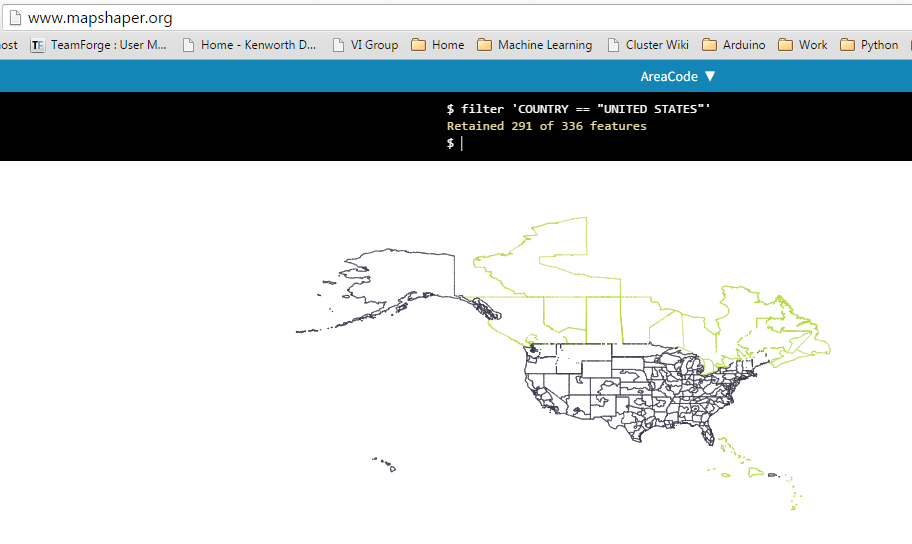

In [10]:
Image("mapshaper.png")

Now that I have a good shapefile let's map it out.

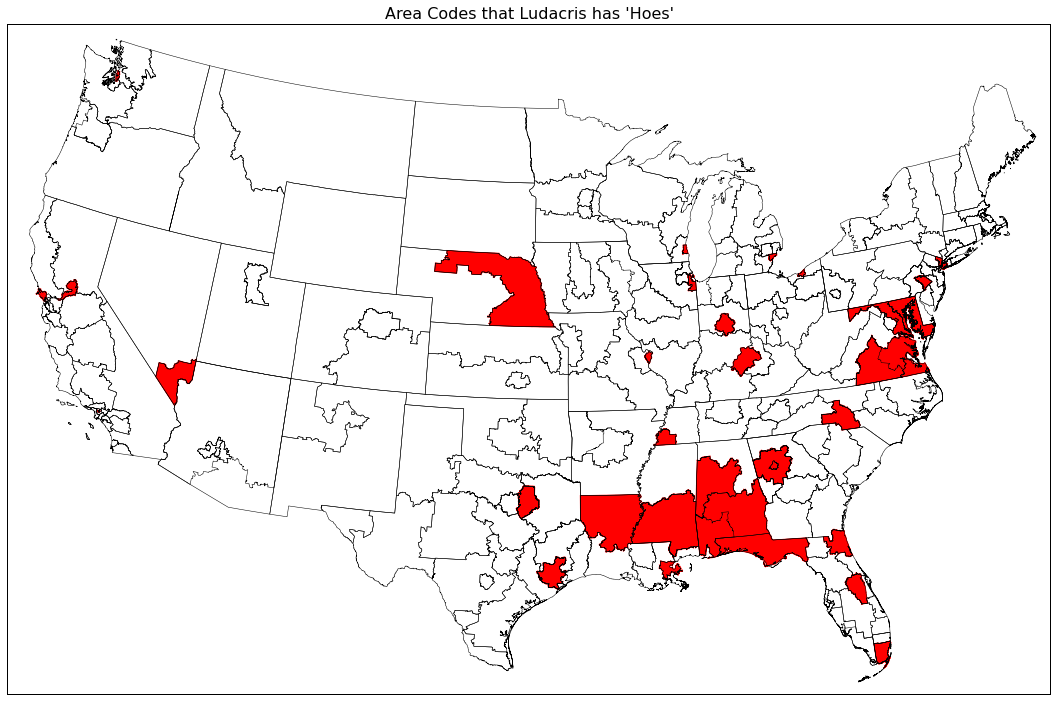

In [11]:
# instantiate a figure
plt.figure(figsize=(24,12))

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile I created
map.readshapefile('./USAreaCode/AreaCode', name='areacodes', drawbounds=True)

# collect the area codes from the shapefile attributes so we can look up the shape obect for an area code by it's 3-digit number
area_codes = []
for shape_dict in map.areacodes_info:
    area_codes.append(shape_dict['NPA'])
    
ax = plt.gca() # get current axes instance

# loop through the song area codes previously parsed and cleaned
for code in codes:
    seg = map.areacodes[area_codes.index(code)]
    poly = Polygon(seg, facecolor='red',edgecolor='red')
    ax.add_patch(poly)

plt.title('Area Codes that Ludacris has \'Hoes\'', fontsize=16)    
plt.show()
#plt.savefig('ludacris_areacodes.png')

There you go, a plot of where Ludacris got hoes. I did not include the 808 area code from Hawaii because it throws the view way off _and_ the Hawaiian plot is so small you don't even see it. 

## System & Library Info

In [12]:
%version_information bs4, requests, matplotlib, basemap

Software versions
Python 3.5.0 32bit [MSC v.1900 32 bit (Intel)]
IPython 4.0.0
OS Windows 7 6.1.7601 SP1
bs4 4.4.1
requests 2.8.1
matplotlib 1.4.3
basemap 1.0.8
Sat Nov 14 23:21:02 2015 Pacific Standard Time